In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# This Block has been used to load the dataset 
df=pd.read_csv("house_price_prediction_dataset.csv")
print(df.head())
print(df.info())

   area_sqft  bedrooms  bathrooms  age_years  location_score     price
0       1660         5          4          3               7  10079045
1       2094         4          4          5               5  10860698
2       1930         5          1         15              10  11030078
3       1895         2          1         14               9  10272767
4       2438         5          1          3               5  12074671


In [16]:
#Statment for Checking Nonnull
print(df.isnull().sum())

area_sqft         0
bedrooms          0
bathrooms         0
age_years         0
location_score    0
price             0
dtype: int64


In [17]:
#statmwnt if data missing 
df.fillna(df.mean(), inplace=True)

,area_sqft,bedrooms,bathrooms,age_years,location_score,price
0,1660,5,4,3,7,10079045
1,2094,4,4,5,5,10860698
2,1930,5,1,15,10,11030078
3,1895,2,1,14,9,10272767
4,2438,5,1,3,5,12074671
5,2969,4,3,1,7,15331528
6,1266,4,1,5,6,7450202
7,2038,3,1,23,8,10003663
8,1130,2,1,14,7,6285708
9,2282,5,3,7,10,13382050


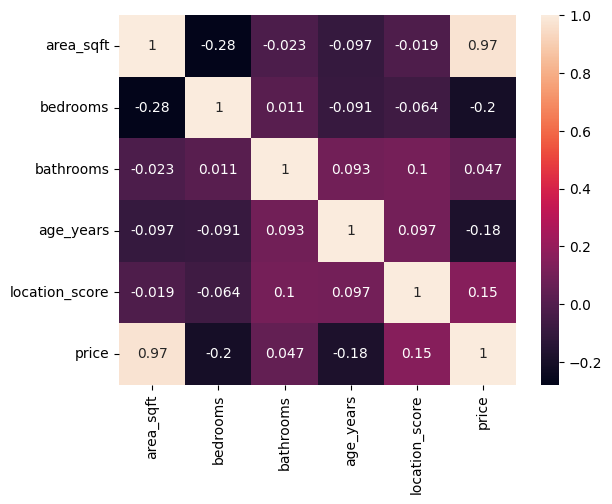

In [18]:
# This shows which features strongly affect price.
sns.heatmap(df.corr(), annot=True)
plt.show()

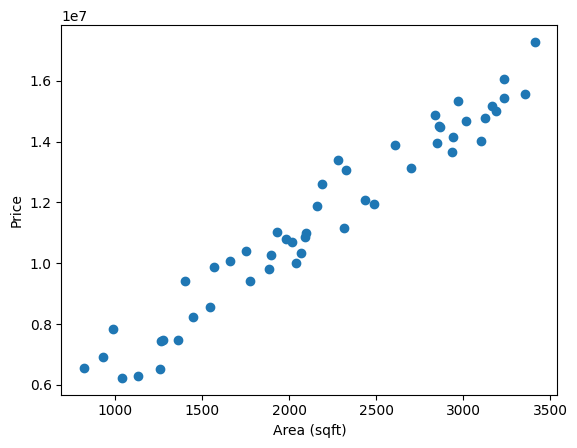

In [21]:
#statment for You should see a positive relationship.
plt.scatter(df['area_sqft'], df['price'])
plt.xlabel("area (sqft)")
plt.ylabel("Price")
plt.show()

In [32]:
#Define Features(x) and target (y)
X = df[['area_sqft', 'bedrooms', 'bathrooms', 'age_years']]
y = df['price']
X = df[['area_sqft', 'bedrooms', 'bathrooms', 'age_years', 'location_score']]
y = df['price']

In [33]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
#Train the model 
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [37]:
#Model Train 
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
#Make Prediction
y_pred = model.predict(X_test)

In [42]:
#statment for Evaluate Model
#mean Squred error
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
#R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

MSE: 14873866851.939137
R2 Score: 0.9979792780300079


In [46]:
#Interpret Results
#This tells:How much each feature impacts price
coefficients = pd.DataFrame(
    model.coef_,
    index=X.columns,
    columns=['Coefficient']
)
print(coefficients)

                  Coefficient
area_sqft         4034.344039
bedrooms        214342.569492
bathrooms       149849.649113
age_years       -48045.089963
location_score  299717.684490


In [47]:
#optional but powerfull(Save and reuse )
import pickle
pickle.dump(model, open("house_model.pkl", "wb"))